In [1]:
import sys
sys.path.insert(0, '../')
import config as cf
import pandas as pd
from collections import Counter
import ast

### Load US-reopen-emotion Data:

In [2]:
df_emos = pd.read_csv(cf.US_REOPEN_EMOTION)
print("Shape = ", df_emos.shape)
df_emos.info()

Shape =  (9957, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 11 columns):
id                   9957 non-null int64
created_at           9957 non-null object
original_text        9957 non-null object
clean_text           9957 non-null object
sentiment            9957 non-null object
lang                 9957 non-null object
screen_name          9957 non-null object
location             9957 non-null object
tone_format_tweet    9957 non-null object
emotions             9957 non-null object
key_tones            9957 non-null object
dtypes: int64(1), object(10)
memory usage: 855.8+ KB


### Flat Emotions by Group:

In [3]:
emos_group = df_emos["key_tones"].tolist()
emos_group = [ast.literal_eval(emos) for emos in emos_group]
emos_flat  = [emo for emos_sub in emos_group for emo in emos_sub]
emos_dict  = dict(Counter(emos_flat))
emos_dict

{'Analytical': 11666,
 'Confident': 3044,
 'Tentative': 5574,
 'Joy': 5833,
 'Fear': 662,
 'Sadness': 5142,
 'Anger': 1696}

### Draw Bar Plot:

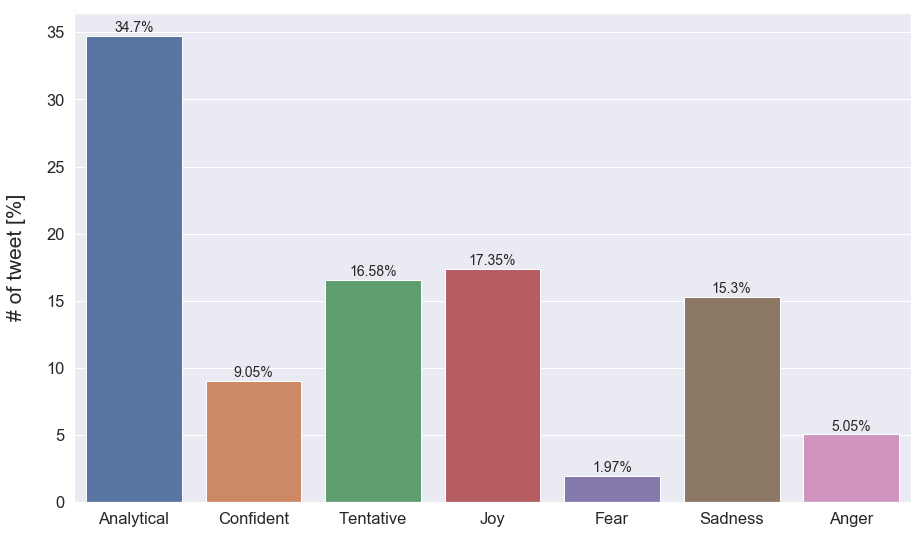

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.5)
keys, values = list(emos_dict.keys()), list(emos_dict.values())
values = [round((float(v)/sum(values))*100,2) for v in values]
plt.figure(figsize = (15, 9))
ax = sns.barplot(x=keys, y=values)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+0.3, str(values[i])+"%", ha="center", fontsize=14)

#ax.set_xlabel("Type of Emotions", fontsize=21, labelpad=20)
ax.set_ylabel("# of tweet [%]",fontsize=21,labelpad=20)
fig = ax.get_figure()    
fig.savefig('figs/tone_perc_type.png', dpi=400)